<a href="https://colab.research.google.com/github/Carinaaa/ML-Learning-Path/blob/intro-sklearn/Feature_Scaling_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://rahul-saini.medium.com/feature-scaling-why-it-is-required-8a93df1af310


Summary:

Most of the machine learning algorithms use Euclidean distance between two data points in their computations, this can be a problem because:
*   large-valued features such as EstimatedSalary can dominate small-features features such as Age

Examples of algorithms that need scaling:

*   k-nearest neighbors
*   Principal Component Analysis (PCA)
*   Speed up in gradient descent

Algorithms where scaling does not have a big impact:
*   Decision Tree based sunch as AdaBoostRegressor
*   Linear Discriminant Alaysis (LDA)
*   Naive Bayes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
dataset_dict = {
    "UserID": [1562, 1563, 1564, 1565, 1667],
    "Gender" : ["Male", "Male", "Female", "Female", "Male"],
    "Age": [19, 35, 26, 29, 19],
    "EstimatedSalary": [19000, 20000, 43000, 57000, 76000],
    "Purchased" : [0, 0, 0, 0, 0]
    }
dataset = pd.DataFrame.from_dict(dataset_dict)
display(dataset)

,UserID,Gender,Age,EstimatedSalary,Purchased
0,1562,Male,19,19000,0
1,1563,Male,35,20000,0
2,1564,Female,26,43000,0
3,1565,Female,29,57000,0
4,1667,Male,19,76000,0


In [12]:
from sklearn.model_selection import train_test_split
# Matrix of all independent variables
X = dataset.iloc[:,2:4].values # all rows, only columns 2 and 3, transform to numpy array

# Matrix of all the depended variables
Y = dataset.iloc[:,-1:].values

# Split train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

## Normalization

Usually is done through rescaling values to a fixed range, such as [0,1].

Formula (Min-Max Normalization):

**x' = (x - xmin) / (xmax - xmin)** where,

*   x - *original values*

*   xmin, xmax - *minumin and maximum of the feature*

*   x' - *normalized values (always between 0 and 1)*

The observations can be described as a normal distribution (Gaussian distribution or bell curve).

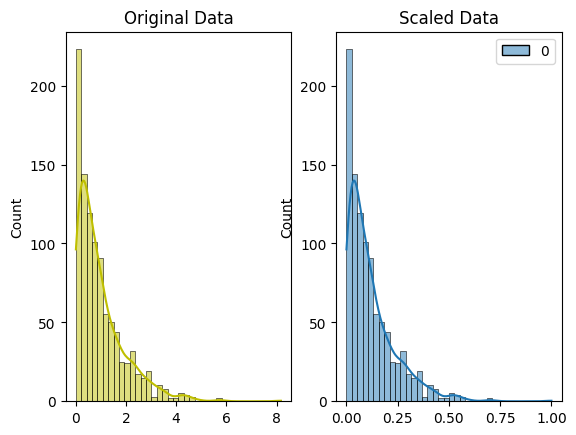

In [18]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# set seed for reproductibility
np.random.seed(42)

# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# min-max scale the data between 0 and 1
scaled_data = MinMaxScaler(feature_range=(0,1)).fit_transform(original_data.reshape(-1,1))

# plot both to compare
fig, ax = plt.subplots(1,2)

sns.histplot(original_data, ax=ax[0], color='y', kde=True)
ax[0].set_title("Original Data")

sns.histplot(scaled_data, ax=ax[1], kde=True)
ax[1].set_title("Scaled Data")

plt.show()

## Mean Normalization

Instead of shifting values into [0,1] like min-max normalization, mean normalization centers data around 0.

**x' = (x - avg(x)) / (xmax - xmin)**

*   Centers data around zero, which can make learning faster.

*   Useful in optimization algorithms like Gradient Descent.

*   Keeps relative distance between values.

In [20]:
from sklearn.preprocessing import Normalizer

# Create an instance of Normalizer
normalizer = Normalizer()
X_train4 = normalizer.fit(X_train).transform(X_train)
X_train4

array([[6.04651052e-04, 9.99999817e-01],
       [9.99999500e-04, 9.99999500e-01],
       [2.49999992e-04, 9.99999969e-01]])

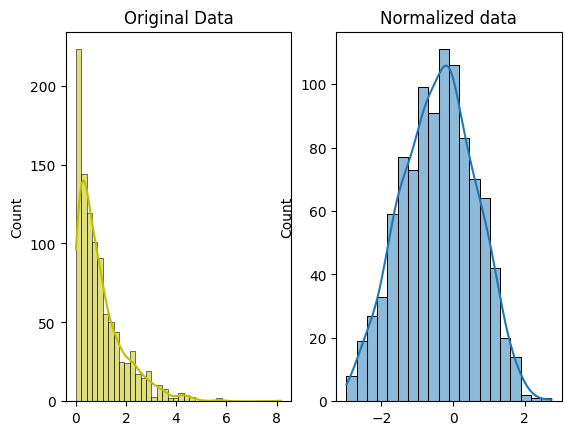

In [22]:
# for Box-Cox Transformation
from scipy import stats

# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)

sns.histplot(original_data, ax=ax[0], color='y', kde=True)
ax[0].set_title("Original Data")

sns.histplot(normalized_data[0], ax=ax[1], kde=True)
ax[1].set_title("Normalized data")

plt.show()

## Standardization (z-score normalization)

Transforms the data such that the resulting distribution has a mean of 0 and standard deviation of 1.

**x' = (x - mean) / variance**

*   Centers data around 0.

*   Scales variance to 1.

*   No fixed range (values may go beyond [-1, 1]).

In [27]:
from sklearn.preprocessing import StandardScaler

# standardize the data
scaler = StandardScaler()
X_train1=scaler.fit_transform(X_train)
X_train1

array([[ 1.41421356, -0.12838815],
       [-0.70710678, -1.15549333],
       [-0.70710678,  1.28388148]])

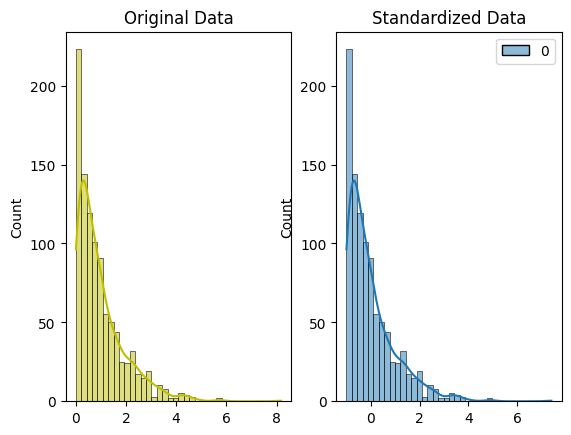

In [28]:
# Example
# set seed for reproductibility
np.random.seed(42)

# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(original_data.reshape(-1, 1))

# plot both to compare
fig, ax = plt.subplots(1,2)

sns.histplot(original_data, ax=ax[0], color='y', kde=True)
ax[0].set_title("Original Data")

sns.histplot(scaled_data, ax=ax[1], kde=True)
ax[1].set_title("Standardized Data")

plt.show()

## Scaling to unit length (Vector Normalization)

This technique rescales a vector (row or feature) so that its Euclidean norm = 1.
It’s often used when direction matters more than magnitude, such as in text mining (TF-IDF), cosine similarity, and clustering.

**x' = x / ||x||** where,

*   ||x|| - norm of vector

||x|| = sqrt(x1^2 + x2^2 + ... + xn^2)


### Why use it?


*   Useful in cosine similarity (text/document comparison).

*   Ensures features are compared by direction, not magnitude.

*   Prevents large-valued vectors from dominating distance-based algorithms.

In [33]:
from math import sqrt
x = [3,4]
x_norm = sqrt(pow(x[0], 2) + pow(x[1], 2))
x_norm

5.0

In [34]:
x_scaled = np.array(x) / x_norm
x_scaled

array([0.6, 0.8])

In [36]:
sqrt(pow(x_scaled[0], 2) + pow(x_scaled[1], 2))

1.0